In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, BatchNormalization, Bidirectional
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Bi-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data to fit the 3D input shape required by Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with 50 epochs
model.fit(X_train, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate classification report
report = classification_report(y_test, y_pred_decoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)

print("Accuracy:", accuracy)
print(report)


Epoch 1/50
12/12 [==============================] - 7s 22ms/step - loss: 0.4834 - accuracy: 0.8174
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4310 - accuracy: 0.8483
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4083 - accuracy: 0.8510
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4136 - accuracy: 0.8255
Epoch 5/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3830 - accuracy: 0.8443
Epoch 6/50
12/12 [==============================] - 0s 19ms/step - loss: 0.3755 - accuracy: 0.8591
Epoch 7/50
12/12 [==============================] - 0s 18ms/step - loss: 0.3956 - accuracy: 0.8443
Epoch 8/50
12/12 [==============================] - 0s 15ms/step - loss: 0.3771 - accuracy: 0.8483
Epoch 9/50
12/12 [==============================] - 0s 17ms/step - loss: 0.3757 - accuracy: 0.8523
Epoch 10/50
12/12 [==============================] - 0s 20ms/step - loss: 0.3996 - accuracy: 0.8309
Epoch 11/

In [2]:
pip install tensorflow-addons


  Obtaining dependency information for tensorflow-addons from https://files.pythonhosted.org/packages/ec/52/047d768c4669db0c059109a88c21a3c71bcda957c46f13967e44b8c7fa4c/tensorflow_addons-0.22.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typeguard<3.0.0,>=2.7 from https://files.pythonhosted.org/packages/9a/bb/d43e5c75054e53efce310e79d63df0ac3f25e34c926be5dffb7d283fb2a8/typeguard-2.13.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   - -------------------------------------- 20.5/719.8 kB ? eta -:--:--
   - -------------------------------------- 20.5/719.8 kB ? eta -:--:--
   -- ------------------------------------ 51.2/719.8 kB 525.1 kB/s eta 0:00:02
   --- ----------------------------------- 71.7/719.8 kB 491.5 kB/s eta 0:00:02
   ----- -------------------------------- 102.4/719.8 kB 535.8 kB/s eta 0:00:02
   ------- ------------------------------ 133.1/719.8 kB 561.1 kB/s eta 0:00:02
   ------- ---------

Epoch 1/50
12/12 [==============================] - 7s 18ms/step - loss: 0.5528 - accuracy: 0.7356
Epoch 2/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4329 - accuracy: 0.8443
Epoch 3/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3952 - accuracy: 0.8644
Epoch 4/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4081 - accuracy: 0.8242
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3844 - accuracy: 0.8604
Epoch 6/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3896 - accuracy: 0.8537
Epoch 7/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3711 - accuracy: 0.8537
Epoch 8/50
12/12 [==============================] - 0s 27ms/step - loss: 0.3848 - accuracy: 0.8617
Epoch 9/50
12/12 [==============================] - 0s 19ms/step - loss: 0.3786 - accuracy: 0.8483
Epoch 10/50
12/12 [==============================] - 0s 16ms/step - loss: 0.3775 - accuracy: 0.8564
Epoch 11/

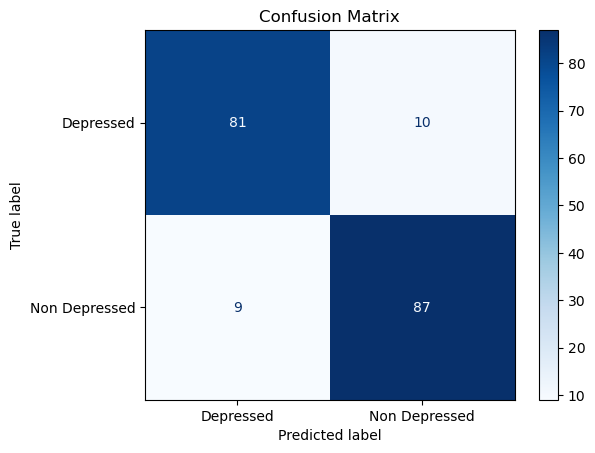

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, BatchNormalization, Bidirectional
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the training datasets for DP and NDP
train_dp = pd.read_csv(r'G:\DataSet\train\trainDP.csv')
train_ndp = pd.read_csv(r'G:\DataSet\train\trainNDP.csv')

# Load the testing datasets for DP and NDP
test_dp = pd.read_csv(r'G:\DataSet\test\testDP.csv')
test_ndp = pd.read_csv(r'G:\DataSet\test\testNDP.csv')

# Combine DP and NDP datasets for training and testing
train_data = pd.concat([train_dp, train_ndp], ignore_index=True)
test_data = pd.concat([test_dp, test_ndp], ignore_index=True)

# Drop problematic columns
train_data = train_data.drop(columns=['FFT', 'Power spectral density'])
test_data = test_data.drop(columns=['FFT', 'Power spectral density'])

# Separate features and target variable for training data
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].values

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].values

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Bi-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape input data to fit the 3D input shape required by Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with 50 epochs
model.fit(X_train, y_train_encoded, epochs=50, batch_size=64)

# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Decode the predicted labels back to original string representations
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_decoded)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


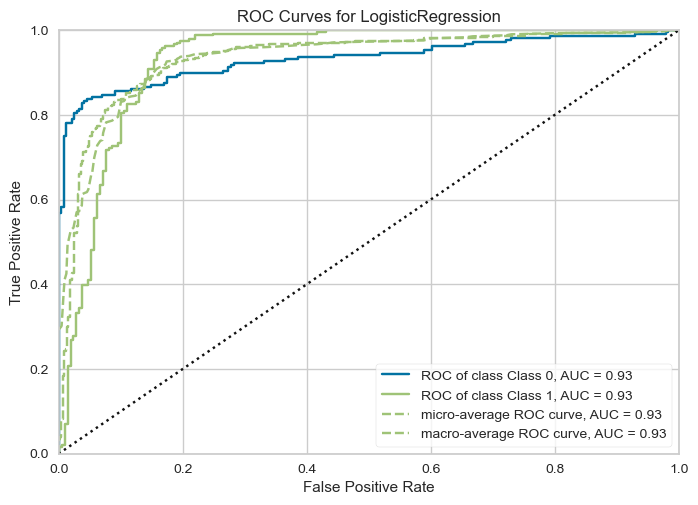

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

# Generate synthetic data for demonstration with different parameters
X, y = make_classification(n_samples=1500, n_features=25, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your classifier (for example, LogisticRegression)
model = LogisticRegression(random_state=42)

# Instantiate the visualizer with the classifier
visualizer = ROCAUC(model, classes=['Class 0', 'Class 1'])

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw the ROC curve
visualizer.show()


Epoch 1/10
13/13 [==============================] - 16s 33ms/step - loss: 0.6785 - accuracy: 0.6112
Epoch 2/10
13/13 [==============================] - 0s 31ms/step - loss: 0.6366 - accuracy: 0.6637
Epoch 3/10
13/13 [==============================] - 0s 30ms/step - loss: 0.6080 - accuracy: 0.6687
Epoch 4/10
13/13 [==============================] - 0s 33ms/step - loss: 0.6042 - accuracy: 0.6662
Epoch 5/10
13/13 [==============================] - 0s 32ms/step - loss: 0.6004 - accuracy: 0.6687
Epoch 6/10
13/13 [==============================] - 0s 31ms/step - loss: 0.5989 - accuracy: 0.6750
Epoch 7/10
13/13 [==============================] - 0s 32ms/step - loss: 0.5945 - accuracy: 0.6725
Epoch 8/10
13/13 [==============================] - 0s 30ms/step - loss: 0.5903 - accuracy: 0.6725
Epoch 9/10
13/13 [==============================] - 0s 32ms/step - loss: 0.5890 - accuracy: 0.6837
Epoch 10/10
7/7 [==============================] - 0s 11ms/step


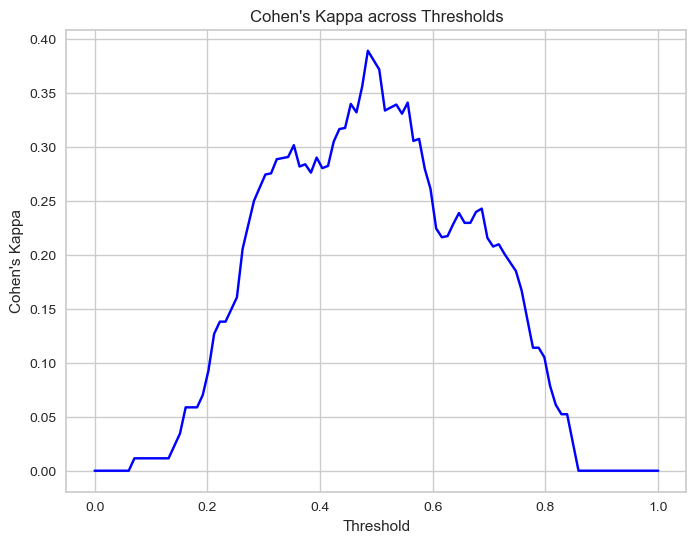

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.optimizers import Adam

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_probs = model.predict(X_test)
    y_pred_threshold = (y_pred_probs > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


Epoch 1/10
13/13 [==============================] - 16s 286ms/step - loss: 0.6940 - accuracy: 0.5088 - val_loss: 0.6958 - val_accuracy: 0.4400
Epoch 2/10
13/13 [==============================] - 0s 35ms/step - loss: 0.6922 - accuracy: 0.5063 - val_loss: 0.6981 - val_accuracy: 0.4750
Epoch 3/10
13/13 [==============================] - 0s 34ms/step - loss: 0.6921 - accuracy: 0.5075 - val_loss: 0.6994 - val_accuracy: 0.4700
Epoch 4/10
13/13 [==============================] - 0s 32ms/step - loss: 0.6917 - accuracy: 0.5150 - val_loss: 0.6958 - val_accuracy: 0.4800
Epoch 5/10
13/13 [==============================] - 0s 38ms/step - loss: 0.6914 - accuracy: 0.5150 - val_loss: 0.6971 - val_accuracy: 0.4800
Epoch 6/10
13/13 [==============================] - 1s 41ms/step - loss: 0.6919 - accuracy: 0.5150 - val_loss: 0.6981 - val_accuracy: 0.4750
Epoch 7/10
13/13 [==============================] - 0s 33ms/step - loss: 0.6917 - accuracy: 0.5038 - val_loss: 0.6971 - val_accuracy: 0.4700
Epoch 8/10


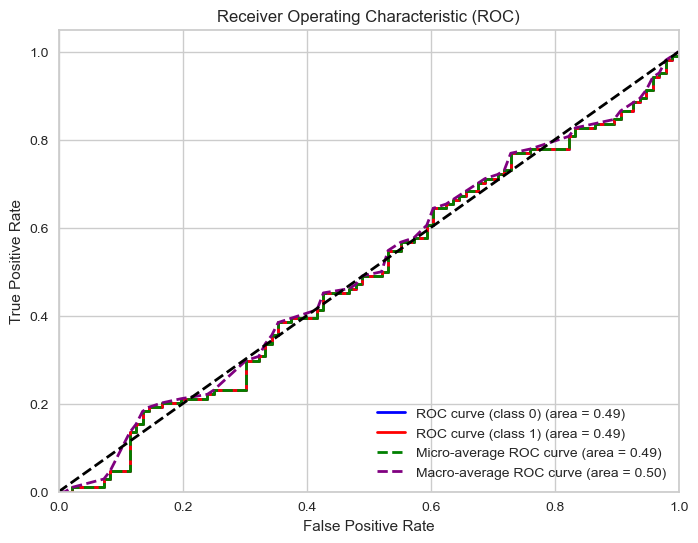

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc

# Generate random data for demonstration
np.random.seed(42)
X = np.random.randn(1000, 10, 1)  # Input data with shape (samples, timesteps, features)
y = np.random.randint(0, 2, size=(1000,))  # Binary labels

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 2
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='ROC curve (class 0) (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='ROC curve (class 1) (area = %0.2f)' % roc_auc[1])
plt.plot(fpr_micro, tpr_micro, color='green', linestyle='--', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot(fpr_macro, tpr_macro, color='purple', linestyle='--', lw=2, label='Macro-average ROC curve (area = %0.2f)' % roc_auc_macro)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [1]:
# Determine predicted classes based on a threshold
threshold = 0.5  # You can adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred_binary)
print("Cohen's Kappa:", kappa)


NameError: name 'y_pred' is not defined

In [2]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
import tensorflow as tf

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=0)

# Varying thresholds (for example, changing the decision threshold for binary classification)
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_proba = model.predict(X_test)
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Find the threshold with maximum Cohen's Kappa
max_kappa_index = np.argmax(kappas)
max_kappa_threshold = thresholds[max_kappa_index]
max_kappa_value = kappas[max_kappa_index]

print("Maximum Cohen's Kappa:")
print("Threshold:", max_kappa_threshold)
print("Value:", max_kappa_value)


IndexError: tuple index out of range